In [163]:
import numpy as np
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sqlalchemy import create_engine


In [164]:
conn = ps.connect(dbname="northwind_calısma",
                  user="postgres",
                  password="121420",
                  port = "5432")

# ÜRÜN ANALİZ CASE 1 

In [165]:
sql = """SELECT pr.product_name,
 ct.category_name, 
 SUM(od.quantity) AS Totalquantity,
 s.company_name,
 cs.country
FROM order_details od
JOIN Products pr ON  od.product_id = pr.product_id 
JOIN Categories ct  ON pr.category_id = ct.category_id
JOIN Orders o ON od.order_id = o.order_id
JOIN Customers cs  ON o.customer_id = cs.customer_id
JOIN Shippers s ON o.ship_via= s.shipper_id
GROUP BY Pr.product_name, ct.category_name, s.company_name, cs.country
ORDER BY Totalquantity DESC;"""







In [166]:
df = sqlio.read_sql_query(sql,conn)
df.head()

,product_name,category_name,totalquantity,company_name,country
0,Chang,Beverages,211,Speedy Express,Germany
1,Camembert Pierrot,Dairy Products,209,Speedy Express,Germany
2,Camembert Pierrot,Dairy Products,202,United Package,Brazil
3,Rhönbräu Klosterbier,Beverages,192,Speedy Express,USA
4,Wimmers gute Semmelknödel,Grains/Cereals,190,United Package,Austria


In [167]:
df.shape

(1488, 5)

In [168]:
print(df.columns)

Index(['product_name', 'category_name', 'totalquantity', 'company_name',
       'country'],
      dtype='object')


In [169]:
df.isnull().sum()

product_name     0
category_name    0
totalquantity    0
company_name     0
country          0
dtype: int64

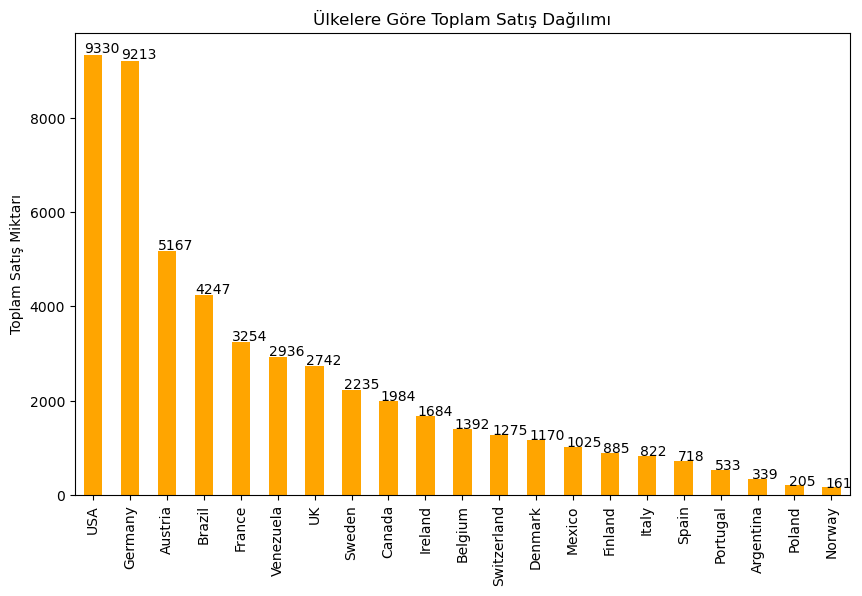

In [170]:
import matplotlib.pyplot as plt

# Doğru sütun adlarını kullanarak gruplama ve görselleştirme
country_sales = df.groupby('country')['totalquantity'].sum().sort_values(ascending=False)

# Bar grafiği ile görselleştirme
plt.figure(figsize=(10, 6))
ax = country_sales.plot(kind='bar', color='orange')
plt.title('Ülkelere Göre Toplam Satış Dağılımı')
plt.xlabel('')
plt.ylabel('Toplam Satış Miktarı')

# Bar çubukları üzerine değer ekleme
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

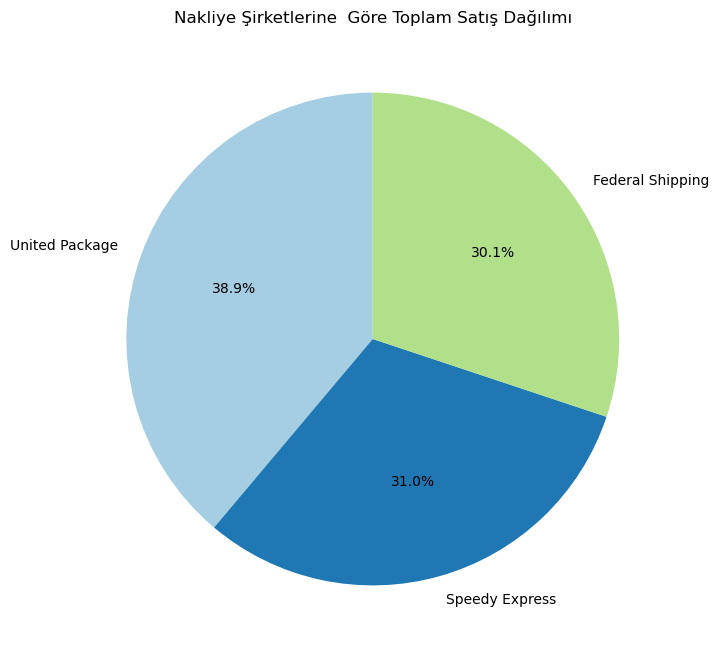

In [171]:
# Nakliye Şirketlerine  göre satış dağılımı
company_sales = df.groupby('company_name')['totalquantity'].sum().sort_values(ascending=False)

# Pasta grafiği ile görselleştirme
plt.figure(figsize=(8, 8))
ax = company_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Nakliye Şirketlerine  Göre Toplam Satış Dağılımı')
ax.set_ylabel('')  # Y ekseni başlığını kaldır

plt.show()

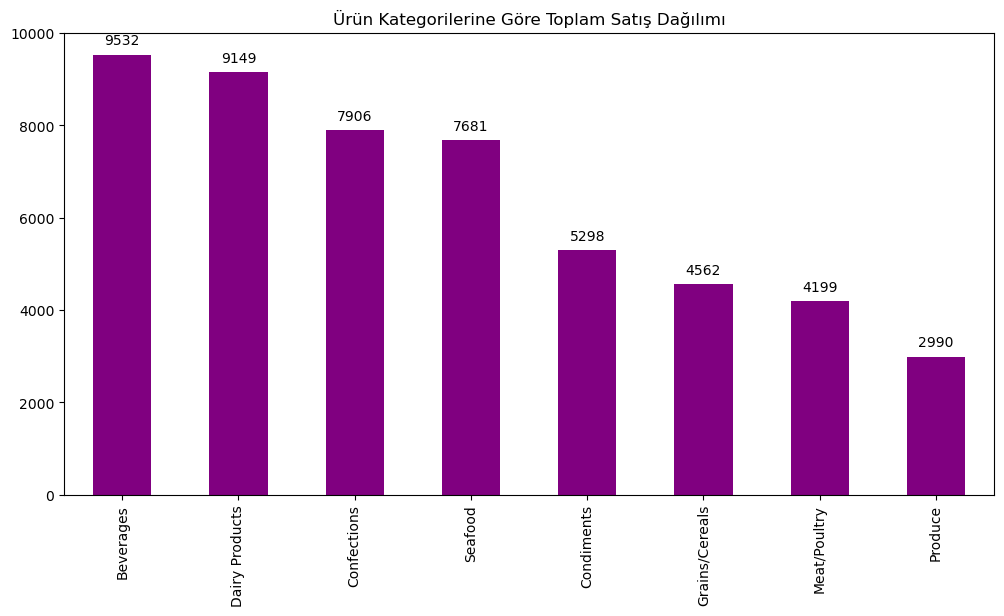

In [172]:
# Ürün kategorilerine göre satış dağılımı
category_sales = df.groupby('category_name')['totalquantity'].sum().sort_values(ascending=False)

# Bar grafiği ile görselleştirme
plt.figure(figsize=(12, 6))
ax = category_sales.plot(kind='bar', color='purple')
plt.title('Ürün Kategorilerine Göre Toplam Satış Dağılımı')
plt.xlabel('')
plt.ylabel('')

# Bar çubukları üzerine değer ekleme
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

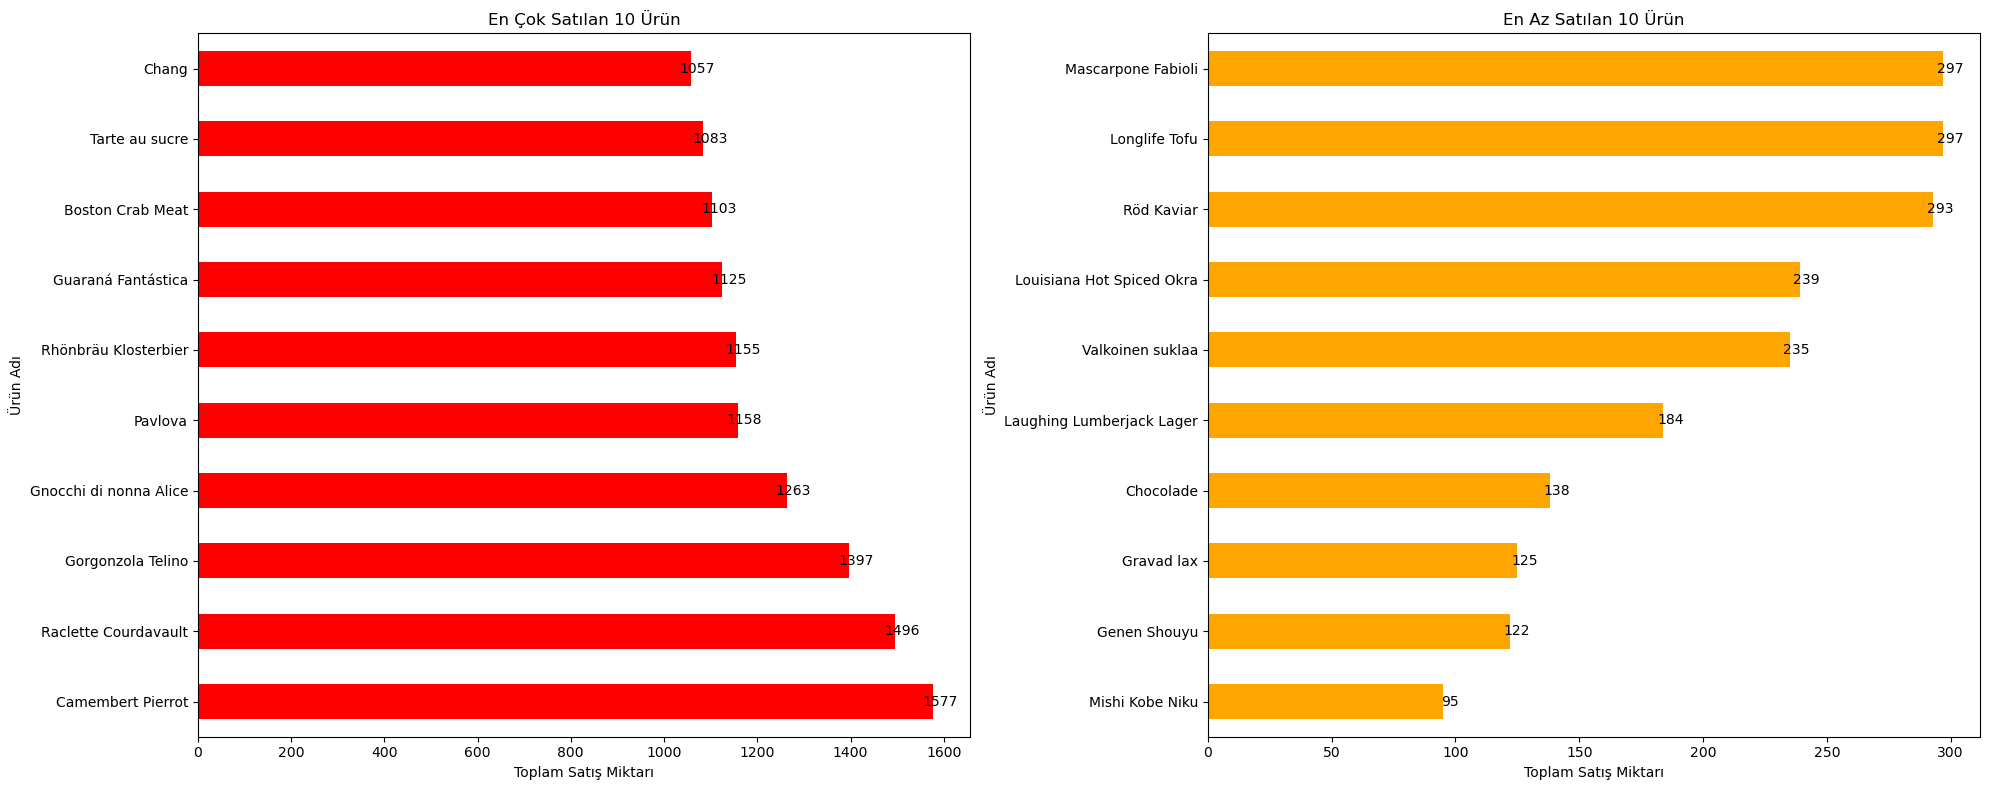

In [173]:
import matplotlib.pyplot as plt

# En çok satılan ürünler
top_products = df.groupby('product_name')['totalquantity'].sum().sort_values(ascending=False).head(10)

# En az satılan ürünler
least_sold_products = df.groupby('product_name')['totalquantity'].sum().sort_values(ascending=True).head(10)

# İki grafiği yan yana yerleştirmek için subplotlar oluşturma
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# En çok satılan ürünler grafiği
ax1 = top_products.plot(kind='barh', color='red', ax=axes[0])
ax1.set_title('En Çok Satılan 10 Ürün')
ax1.set_xlabel('Toplam Satış Miktarı')
ax1.set_ylabel('Ürün Adı')

# Bar çubukları üzerine değer ekleme
for p in ax1.patches:
    ax1.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2),
                 ha='center', va='center', xytext=(5, 0), textcoords='offset points')

# En az satılan ürünler grafiği
ax2 = least_sold_products.plot(kind='barh', color='orange', ax=axes[1])
ax2.set_title('En Az Satılan 10 Ürün')
ax2.set_xlabel('Toplam Satış Miktarı')
ax2.set_ylabel('Ürün Adı')

# Bar çubukları üzerine değer ekleme
for p in ax2.patches:
    ax2.annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2),
                 ha='center', va='center', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

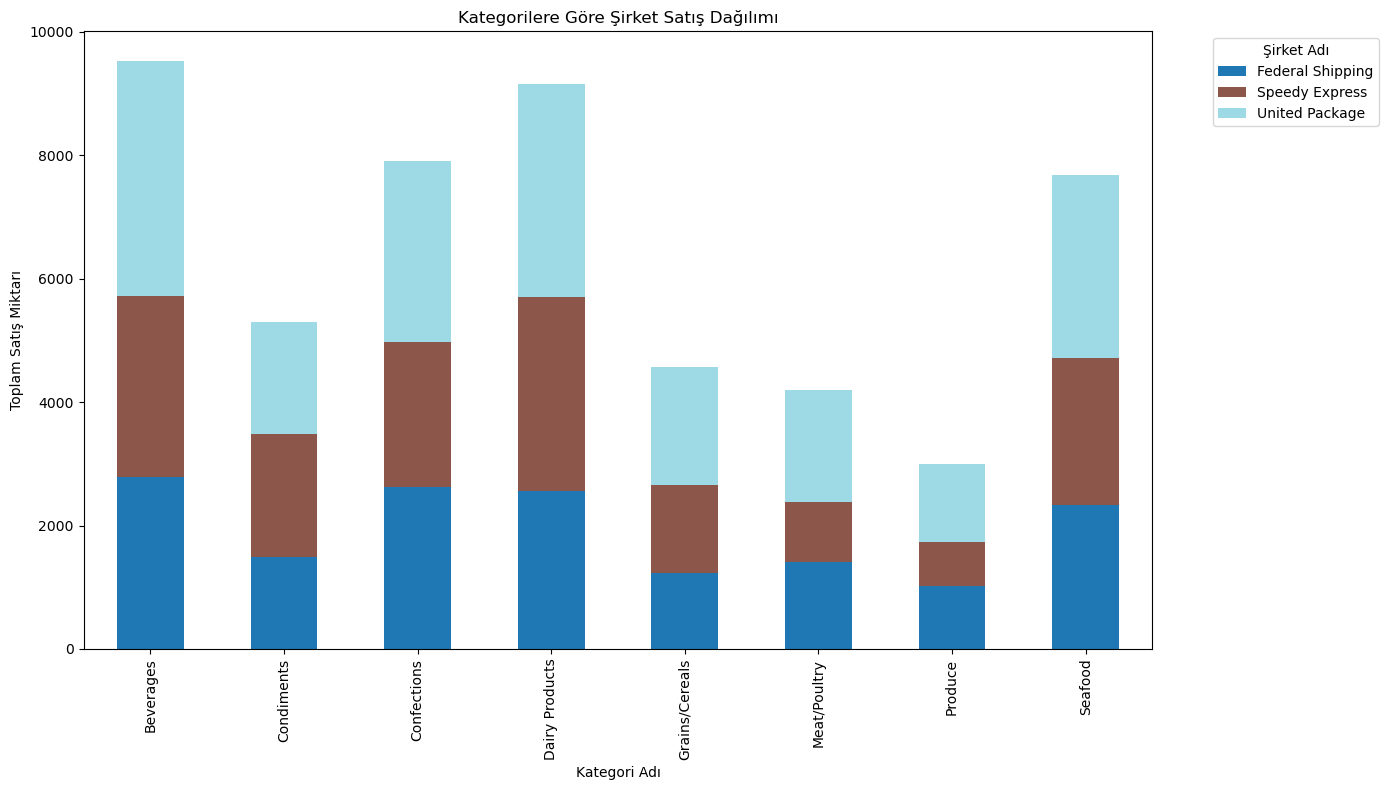

In [174]:
# Kategorilere göre Nakliye dağılımı
company_category_sales = df.pivot_table(index='category_name', columns='company_name', values='totalquantity', aggfunc='sum').fillna(0)

# Stacked bar plot ile görselleştirme
company_category_sales.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Kategorilere Göre Şirket Satış Dağılımı')
plt.xlabel('Kategori Adı')
plt.ylabel('Toplam Satış Miktarı')
plt.legend(title='Şirket Adı', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [211]:
import numpy as np
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as p
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sqlalchemy import create_engine
import sqlite3

In [212]:
conn = ps.connect(dbname="northwind_calısma",
                  user="postgres",
                  password="121420",
                  port = "5432")

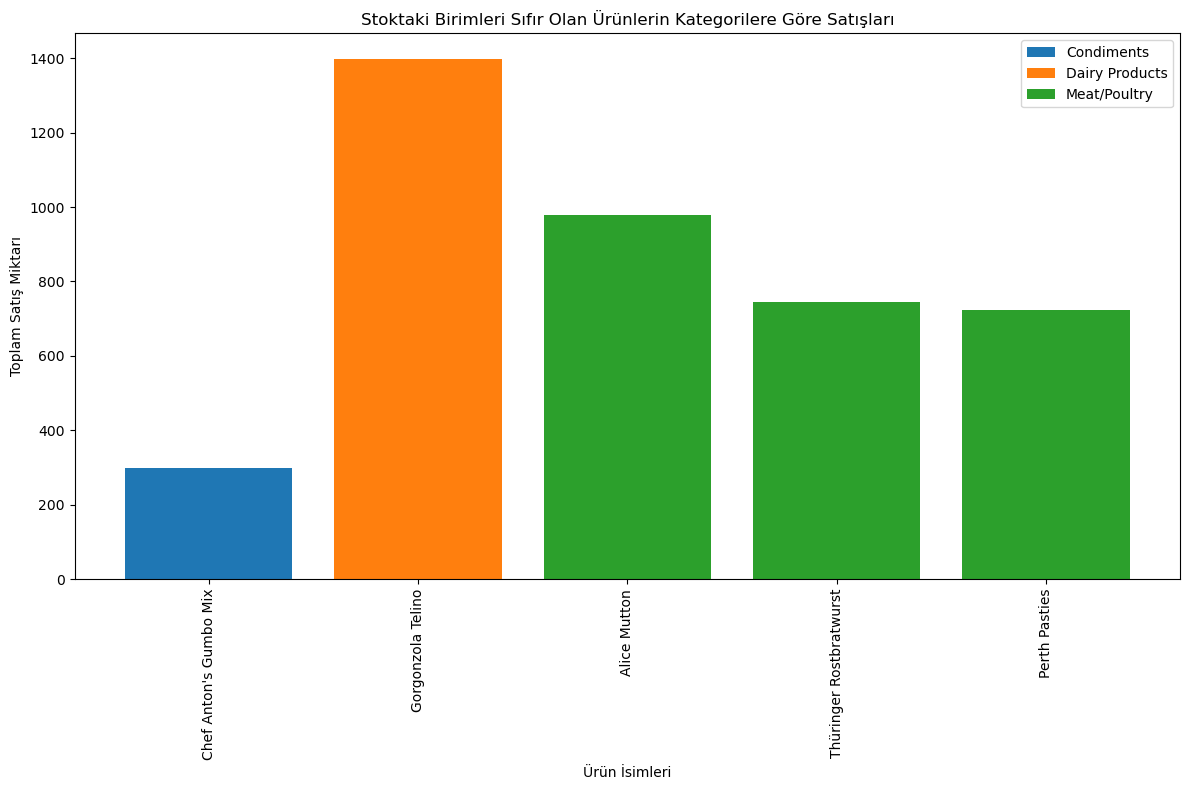

In [214]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# PostgreSQL bağlantı bilgileri
dbname = 'northwind_calısma'
user = 'postgres'
password = '121420'
host = 'localhost'  # veya veritabanı sunucusunun adresi

# Veritabanı bağlantısı
conn = psycopg2.connect(dbname=dbname, user=user, password=password, host=host)
cursor = conn.cursor()

# SQL sorgusu
sql_query = """
    SELECT ct.category_name,
           pr.product_name,
           SUM(od.quantity) AS totalsold,
           pr.units_in_stock
    FROM categories ct
    JOIN products pr ON ct.category_id = pr.category_id
    JOIN order_details od ON pr.product_id = od.product_id
    WHERE pr.units_in_stock = 0
    GROUP BY ct.category_name, pr.product_name, pr.units_in_stock
    ORDER BY pr.units_in_stock DESC;
"""

# Verileri Pandas DataFrame'e yükleme
df = pd.read_sql_query(sql_query, conn)

# Veritabanı bağlantısını kapat
cursor.close()
conn.close()

# Görselleştirme
plt.figure(figsize=(12, 8))
for category, group in df.groupby('category_name'):
    plt.bar(group['product_name'], group['totalsold'], label=category)

plt.xlabel('Ürün İsimleri')
plt.ylabel('Toplam Satış Miktarı')
plt.title('Stoktaki Birimleri Sıfır Olan Ürünlerin Kategorilere Göre Satışları')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

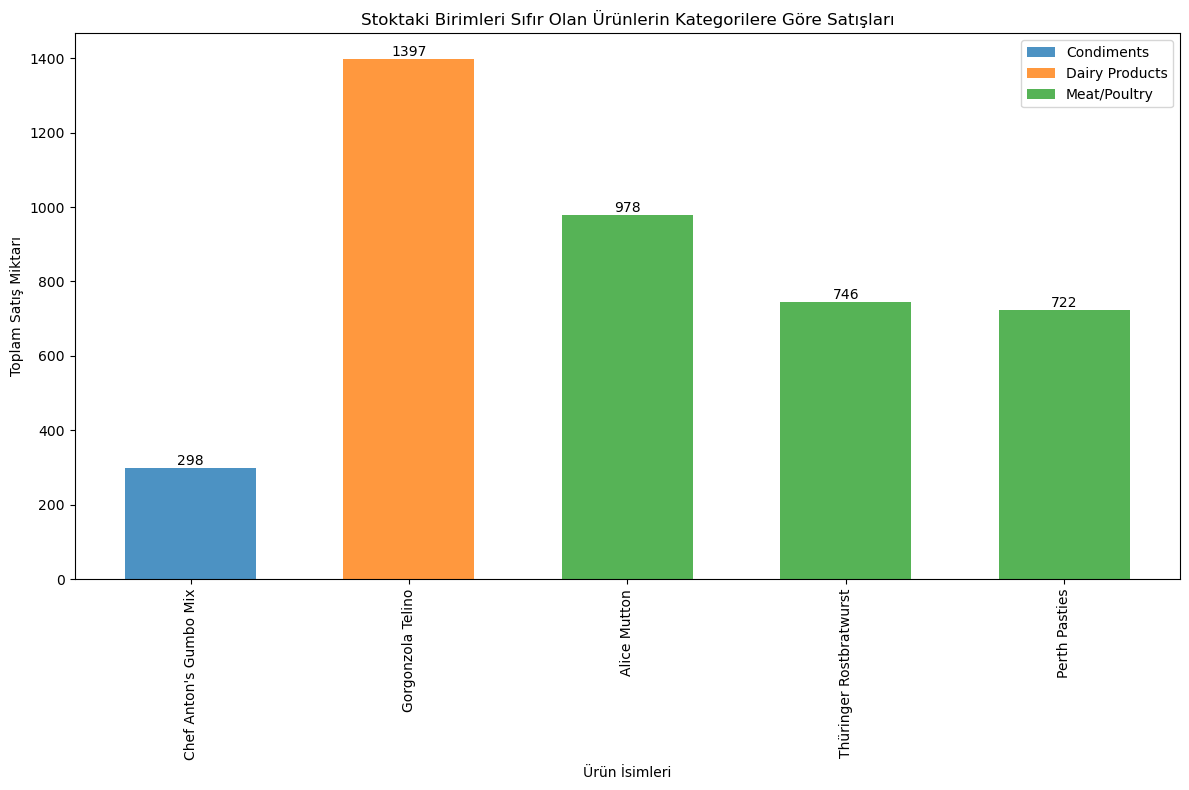

In [217]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# PostgreSQL bağlantı bilgileri
dbname = 'northwind_calısma'
user = 'postgres'
password = '121420'
host = 'localhost'  # veya veritabanı sunucusunun adresi

# Veritabanı bağlantısı
conn = psycopg2.connect(dbname=dbname, user=user, password=password, host=host)
cursor = conn.cursor()

# SQL sorgusu
sql_query = """
    SELECT ct.category_name,
           pr.product_name,
           SUM(od.quantity) AS totalsold,
           pr.units_in_stock
    FROM categories ct
    JOIN products pr ON ct.category_id = pr.category_id
    JOIN order_details od ON pr.product_id = od.product_id
    WHERE pr.units_in_stock = 0
    GROUP BY ct.category_name, pr.product_name, pr.units_in_stock
    ORDER BY pr.units_in_stock DESC;
"""

# Verileri Pandas DataFrame'e yükleme
df = pd.read_sql_query(sql_query, conn)

# Veritabanı bağlantısını kapat
cursor.close()
conn.close()

# Görselleştirme
plt.figure(figsize=(12, 8))
bars = []
for category, group in df.groupby('category_name'):
    bar = plt.bar(group['product_name'], group['totalsold'], label=category, width=0.6, alpha=0.8)
    bars.append(bar)

plt.xlabel('Ürün İsimleri')
plt.ylabel('Toplam Satış Miktarı')
plt.title('Stoktaki Birimleri Sıfır Olan Ürünlerin Kategorilere Göre Satışları')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Her barın üzerine değerleri yazma
for bar in bars:
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height, '%d' % int(height),
                 ha='center', va='bottom')


plt.show()

# SHIPPING ANALİZİ CASE 2 

In [175]:
import numpy as np
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as p
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sqlalchemy import create_engine


In [176]:
conn = ps.connect(dbname="northwind_calısma",
                  user="postgres",
                  password="121420",
                  port = "5432")

In [177]:


SQL_1 = """ WITH ShippingDuration AS (
    SELECT O.ORDER_ID,
           O.ORDER_DATE,
           O.SHIPPED_DATE,
          
	       EXTRACT(day FROM AGE(O.SHIPPED_DATE , O.ORDER_DATE)) AS SHIPPING_DURATION
    FROM ORDERS O
    WHERE O.SHIPPED_DATE IS NOT NULL
),
ShippingCost AS (
    SELECT O.ORDER_ID,
           O.FREIGHT AS SHIPPING_COST,
           O.SHIP_VIA
    FROM ORDERS O
),
ShipperPerformance AS (
    SELECT S.SHIPPER_ID,
           S.COMPANY_NAME,
           COUNT(O.ORDER_ID) AS NUMBER_OF_ORDERS,
           AVG(SD.SHIPPING_DURATION) AS AVG_SHIPPING_DURATION,
           SUM(SC.SHIPPING_COST) AS TOTAL_SHIPPING_COST,
           AVG(SC.SHIPPING_COST) AS AVG_SHIPPING_COST
    FROM ORDERS O
    JOIN SHIPPERS S ON O.SHIP_VIA = S.SHIPPER_ID
    JOIN ShippingDuration SD ON O.ORDER_ID = SD.ORDER_ID
    JOIN ShippingCost SC ON O.ORDER_ID = SC.ORDER_ID
    GROUP BY S.SHIPPER_ID, S.COMPANY_NAME
)
SELECT SP.SHIPPER_ID,
       SP.COMPANY_NAME,
       SP.NUMBER_OF_ORDERS,
       SP.AVG_SHIPPING_DURATION,
       SP.TOTAL_SHIPPING_COST,
       SP.AVG_SHIPPING_COST
FROM ShipperPerformance SP
ORDER BY SP.NUMBER_OF_ORDERS DESC; """


In [178]:

df1 = sqlio.read_sql_query(SQL_1, conn)

print(df1.head())

   shipper_id      company_name  number_of_orders  avg_shipping_duration  \
0           2    United Package               315               8.276190   
1           3  Federal Shipping               249               6.867470   
2           1    Speedy Express               245               7.579592   

   total_shipping_cost  avg_shipping_cost  
0            27556.764          87.481778  
1            20363.090          81.779518  
2            16035.158          65.449633  


<Figure size 1000x600 with 0 Axes>

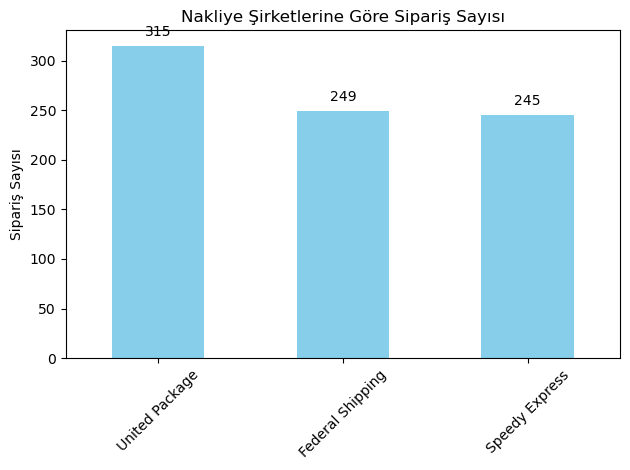

In [179]:
import matplotlib.pyplot as plt

# Nakliye şirketlerine göre sipariş sayısı
plt.figure(figsize=(10, 6))
ax = df1.plot(kind='bar', x='company_name', y='number_of_orders', color='skyblue', legend=False)
plt.title('Nakliye Şirketlerine Göre Sipariş Sayısı')
plt.xlabel('')
plt.ylabel('Sipariş Sayısı')

# Bar çubukları üzerine değer ekleme
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

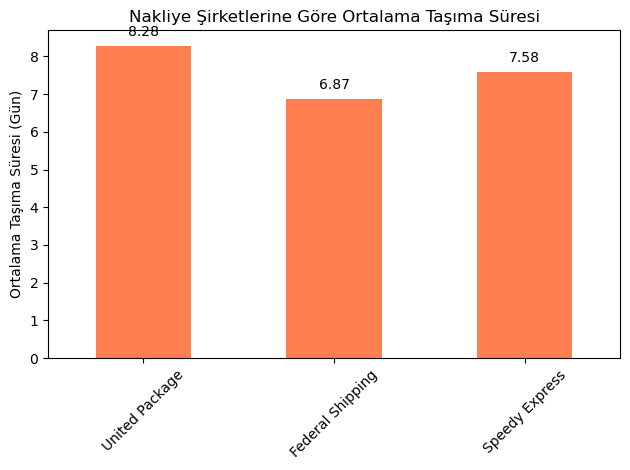

In [181]:
# Ortalama taşıma süresi
plt.figure(figsize=(10, 6))
ax = df1.plot(kind='bar', x='company_name', y='avg_shipping_duration', color='coral', legend=False)
plt.title('Nakliye Şirketlerine Göre Ortalama Taşıma Süresi')
plt.xlabel('')
plt.ylabel('Ortalama Taşıma Süresi (Gün)')

# Bar çubukları üzerine değer ekleme
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

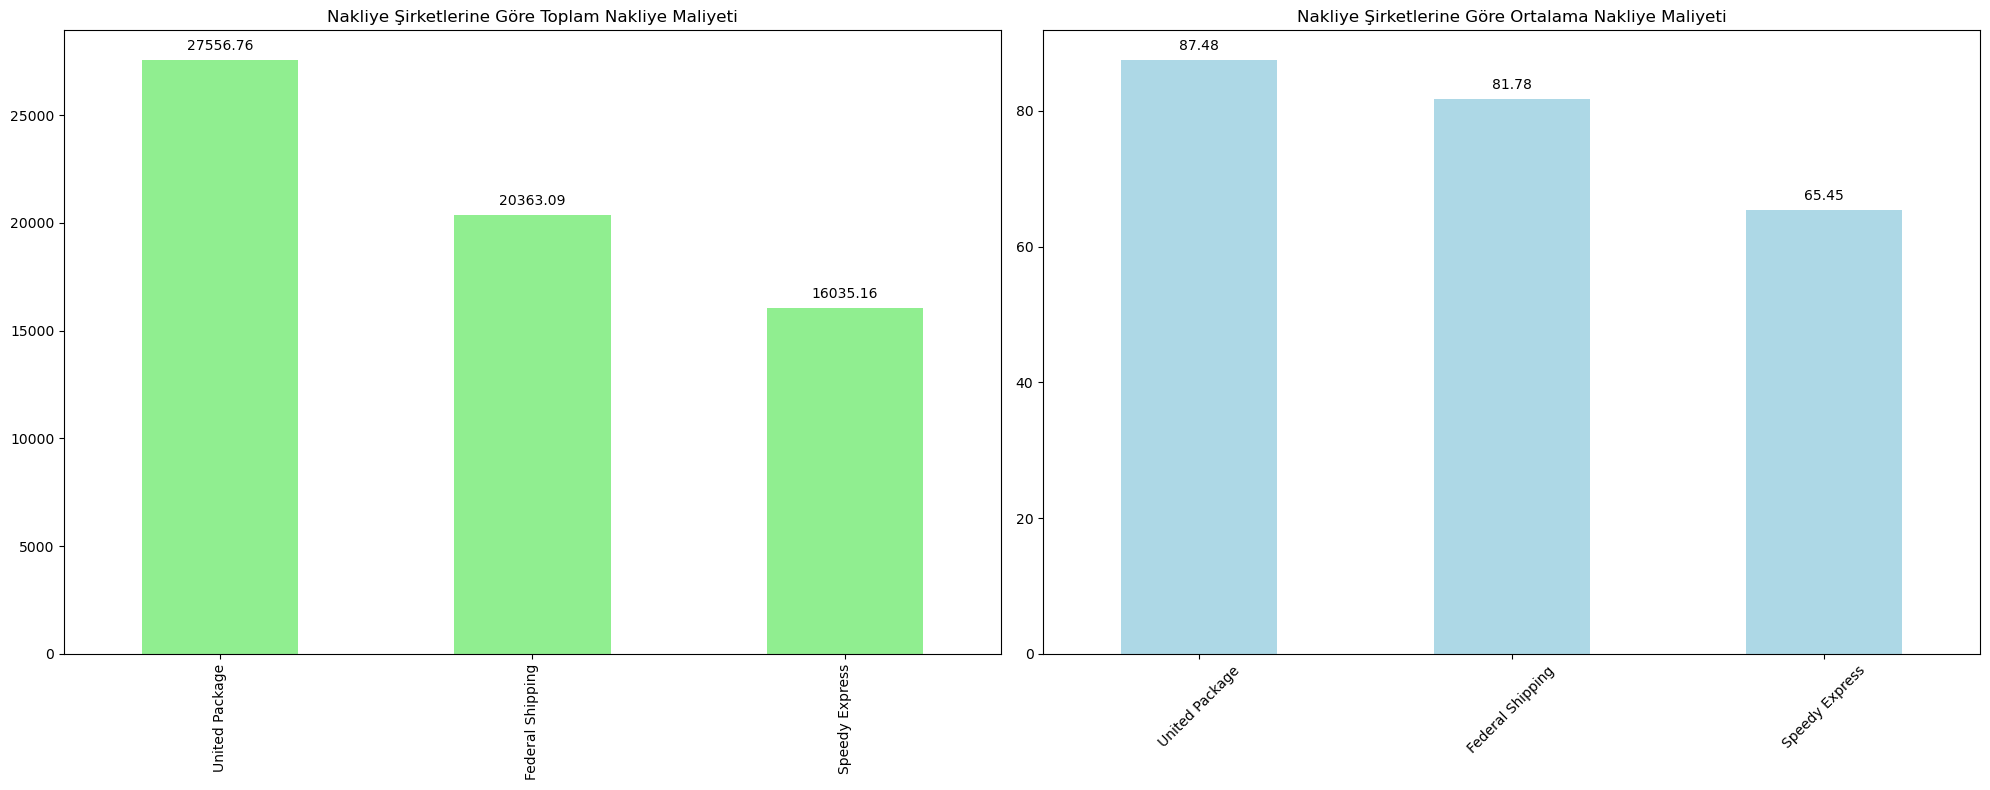

In [182]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Toplam nakliye maliyeti
ax1 = df1.plot(kind='bar', x='company_name', y='total_shipping_cost', color='lightgreen', ax=axes[0], legend=False)
ax1.set_title('Nakliye Şirketlerine Göre Toplam Nakliye Maliyeti')
ax1.set_xlabel('')
ax1.set_ylabel('')

# Bar çubukları üzerine değer ekleme
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Ortalama nakliye maliyeti
ax2 = df1.plot(kind='bar', x='company_name', y='avg_shipping_cost', color='lightblue', ax=axes[1], legend=False)
ax2.set_title('Nakliye Şirketlerine Göre Ortalama Nakliye Maliyeti')
ax2.set_xlabel('')
ax2.set_ylabel('')

# Bar çubukları üzerine değer ekleme
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

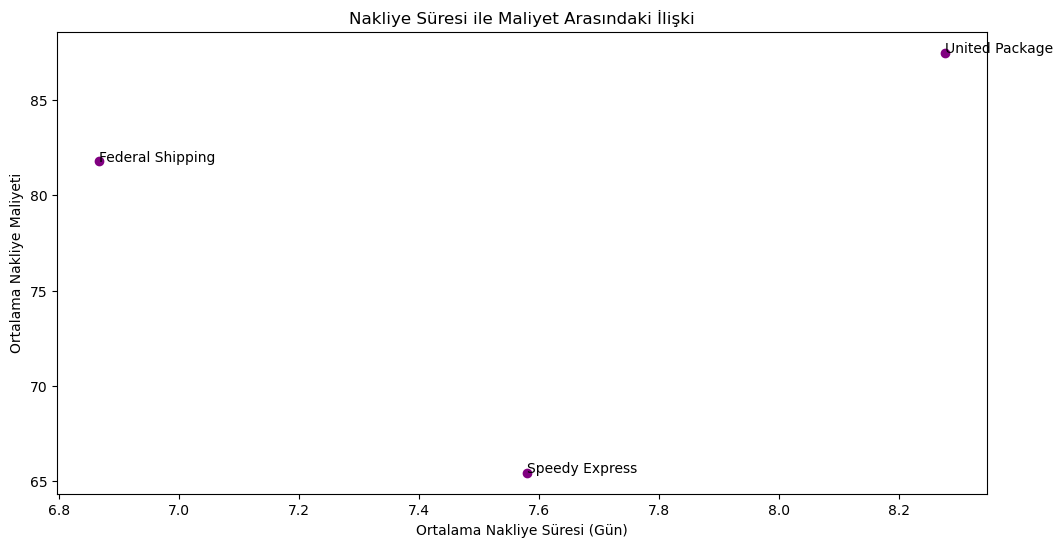

In [183]:
# Nakliye Süresi ile Maliyet Arasındaki İlişki
plt.figure(figsize=(12, 6))
plt.scatter(df1['avg_shipping_duration'], df1['avg_shipping_cost'], color='purple')
plt.title('Nakliye Süresi ile Maliyet Arasındaki İlişki')
plt.xlabel('Ortalama Nakliye Süresi (Gün)')
plt.ylabel('Ortalama Nakliye Maliyeti')

# Her bir nokta üzerinde şirket isimlerini göster
for i, txt in enumerate(df1['company_name']):
    plt.annotate(txt, (df1['avg_shipping_duration'][i], df1['avg_shipping_cost'][i]))

plt.show()

In [184]:

SQL_2 = """ WITH ShippingDuration AS (
    SELECT O.ORDER_ID,
           O.ORDER_DATE,
           O.SHIPPED_DATE,
           EXTRACT(day FROM AGE(O.SHIPPED_DATE , O.ORDER_DATE)) AS SHIPPING_DURATION
    FROM ORDERS O
    WHERE O.SHIPPED_DATE IS NOT NULL
)
SELECT S.SHIPPER_ID,
       S.COMPANY_NAME,
       COUNT(CASE WHEN SD.SHIPPING_DURATION <= 5 THEN 1 END) AS ON_TIME_DELIVERIES,
       COUNT(O.ORDER_ID) AS TOTAL_ORDERS,
       (COUNT(CASE WHEN SD.SHIPPING_DURATION <= 5 THEN 1 END) * 100.0 / COUNT(O.ORDER_ID)) AS ON_TIME_DELIVERY_RATE
FROM ORDERS O
JOIN SHIPPERS S ON O.SHIP_VIA = S.SHIPPER_ID
JOIN ShippingDuration SD ON O.ORDER_ID = SD.ORDER_ID
GROUP BY S.SHIPPER_ID, S.COMPANY_NAME
ORDER BY ON_TIME_DELIVERY_RATE DESC; """

In [185]:
df2 = sqlio.read_sql_query(SQL_2, conn)

# Veriyi gösterme
print(df2.head())


   shipper_id      company_name  on_time_deliveries  total_orders  \
0           3  Federal Shipping                 100           249   
1           2    United Package                 113           315   
2           1    Speedy Express                  81           245   

   on_time_delivery_rate  
0              40.160643  
1              35.873016  
2              33.061224  


<Figure size 1000x600 with 0 Axes>

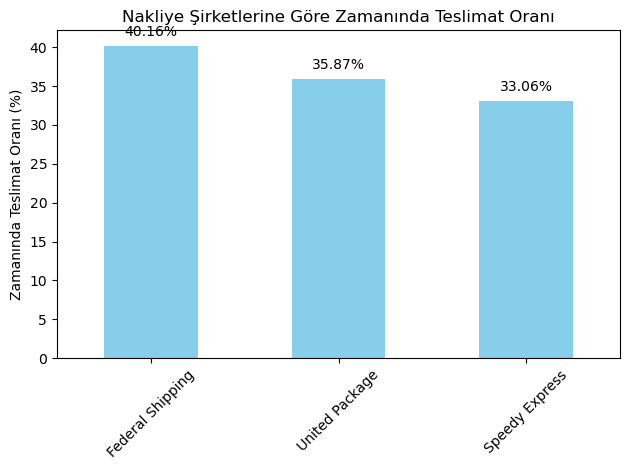

In [189]:
# Zamanında teslimat oranlarını görselleştirme
plt.figure(figsize=(10, 6))
ax = df2.plot(kind='bar', x='company_name', y='on_time_delivery_rate', color='skyblue', legend=False)
plt.title('Nakliye Şirketlerine Göre Zamanında Teslimat Oranı')
plt.xlabel('')
plt.ylabel('Zamanında Teslimat Oranı (%)')

# Bar çubukları üzerine değer ekleme
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()